In [ ]:
from jax import config
config.update('jax_enable_x64', True)
from pathlib import Path

import jax
import gpjax as gpx
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from uncprop.models.vsem.runner import run_vsem_experiment
from uncprop.utils.plot import set_plot_theme, smart_subplots
from uncprop.utils.grid import plot_coverage_curve_reps

colors = set_plot_theme()
base_dir = Path('/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper')

/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from uncprop.models.vsem.experiment import summarize_rep, load_results

out_dir = base_dir / 'out' / 'vsem'
gp_subdirs = ['gp_N4', 'gp_N8', 'gp_N16']
clip_gp_subdirs = ['clip_gp_N4', 'clip_gp_N8', 'clip_gp_N16']

gp_results = load_results(out_dir, gp_subdirs)
clip_gp_results = load_results(out_dir, clip_gp_subdirs)

In [ ]:
from uncprop.models.vsem.experiment import summarize_rep

subdir_name = 'clip_gp_N4'
rep_idx = 4

grid, results, log_dens, plots = summarize_rep(out_dir=out_dir,
                                               subdir_name=subdir_name,
                                               rep_idx=rep_idx,
                                               n_reps=100)

In [3]:
gp_subdirs = ['gp_N4', 'gp_N8', 'gp_N16']
clip_gp_subdirs = ['clip_gp_N4', 'clip_gp_N8', 'clip_gp_N16']

gp_results = {subdir: jnp.load(out_dir / subdir / 'results.')}

NameError: name 'subdir' is not defined

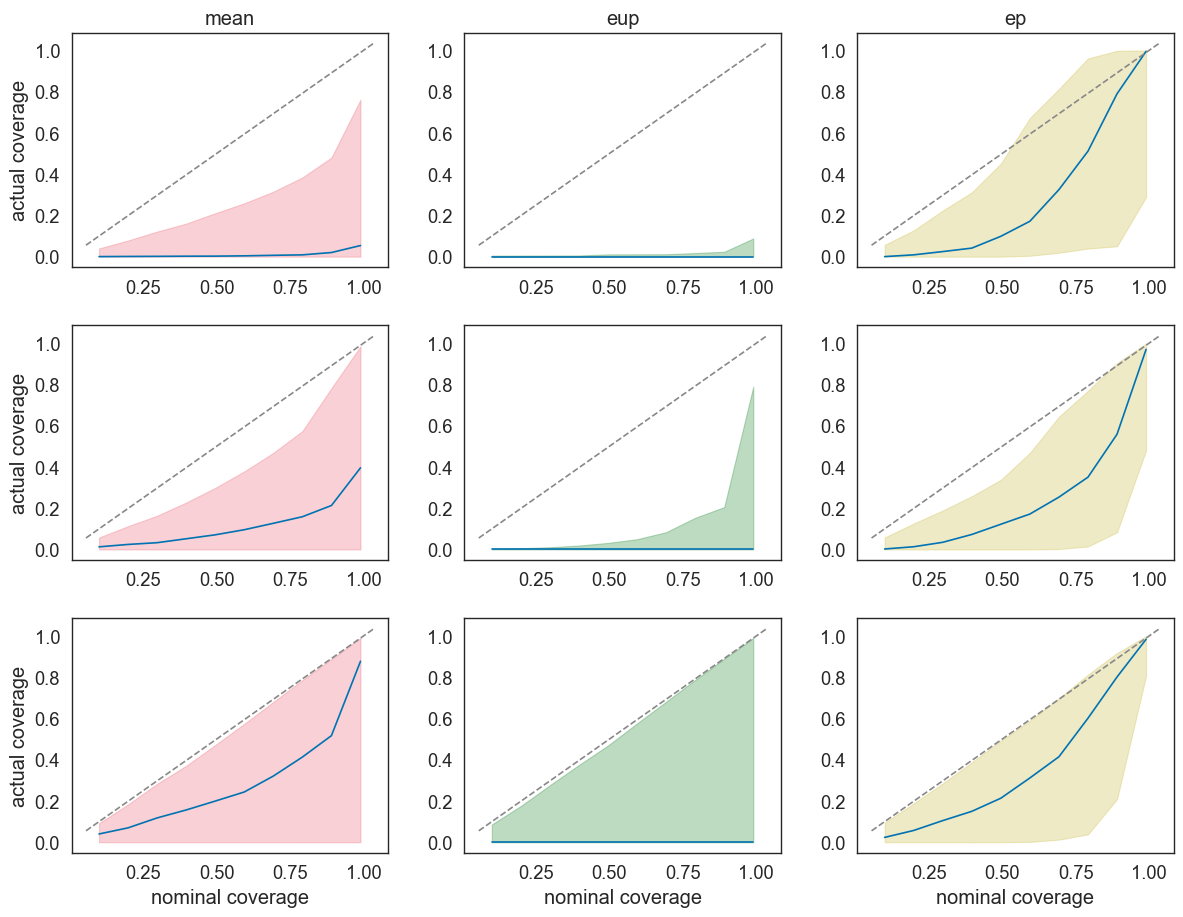

In [ ]:
fig, axs = smart_subplots(nrows=3, ncols=3, flatten=False)

ndesign = [4, 8, 16]
approx = ['mean', 'eup', 'ep']
base_subdir_name = 'gp'

for n_idx, n in enumerate(ndesign):
    subdir_name = f'{base_subdir_name}_N{n}'
    res = gp_results[subdir_name]['results']
    for dist_idx, dist_name in enumerate(approx):
        ax = axs[n_idx, dist_idx]
        idx = list(res['dist_names']).index(dist_name)

        plot_coverage_curve_reps(log_coverage=res['log_coverage'][:,[idx],:], 
                                 probs=res['probs'], 
                                 names=[dist_name],
                                 colors=colors,
                                 qmin=0.05,
                                 qmax=0.95,
                                 single_plot=True,
                                 ax=ax,
                                 alpha=0.3, max_cols=3)
        
        if n_idx == 0: # first row
            ax.set_title(dist_name)
        if n_idx != (len(ndesign)-1): # all but final row
            ax.set_xlabel(None)
        if dist_idx != 0: # all but first column
            ax.set_ylabel(None)

        ax.get_legend().remove()


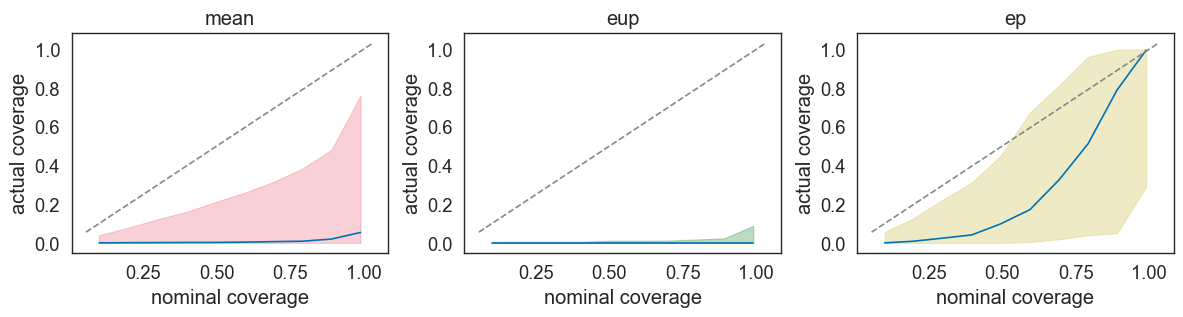

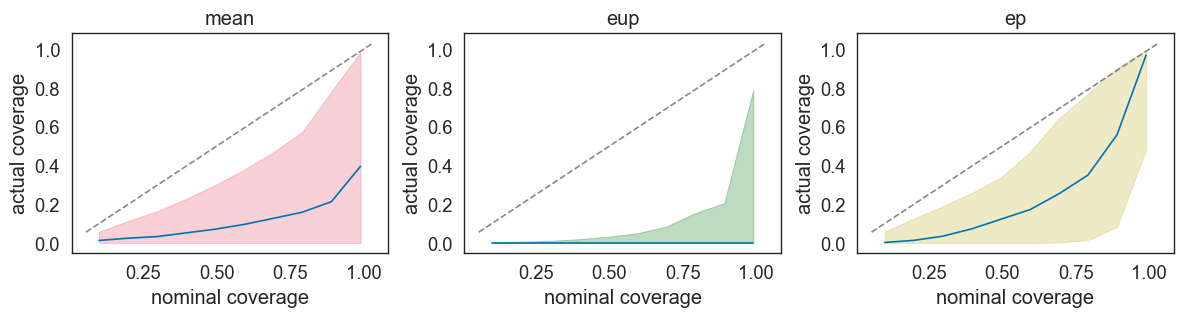

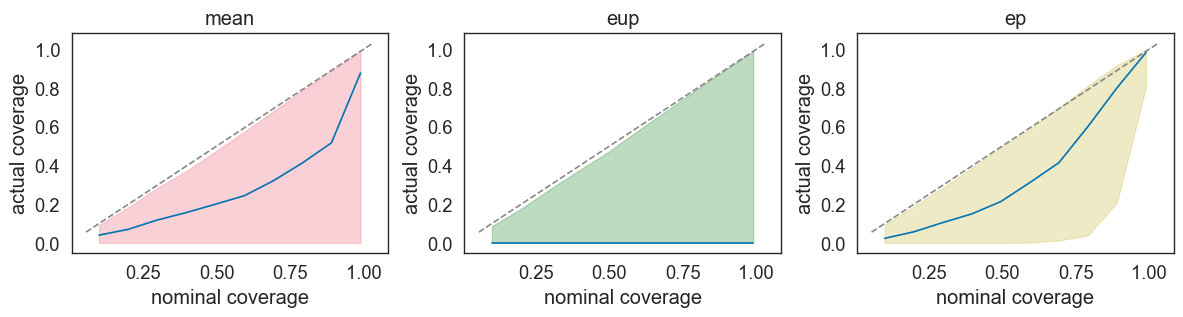

In [11]:
from uncprop.utils.grid import plot_coverage_curve_reps

for subdir, info in gp_results.items():
    res = info['results']
    
    # top row
    set_title = (subdir == 'clip_gp_')

    if subdir == 'clip_gp_N4':
        set_title = True

    plot_coverage = plot_coverage_curve_reps(log_coverage=res['log_coverage'], 
                                             probs=res['probs'], 
                                             names=res['dist_names'],
                                             colors=colors,
                                             qmin=0.05,
                                             qmax=0.95,
                                             single_plot=False,
                                             alpha=0.3, max_cols=3)